# Zero Shot Text Classifier with SetFit
* Notebook by Adam Lang
* Date: 9/19/2024

# SetFit Classifier - Zero shot
* Original paper: https://towardsdatascience.com/sentence-transformer-fine-tuning-setfit-outperforms-gpt-3-on-few-shot-text-classification-while-d9a3788f0b4e

In [2]:
## imports
import numpy as np
import pandas as pd

In [3]:
## upload datasets - kaggle
data_path = '/content/drive/MyDrive/Colab Notebooks/sentence_transformers/movie_review.csv'

In [4]:
## upload data
df = pd.read_csv(data_path,sep='\t')
df.head()

,id,review,sentiment
0,5814_8,With all this stuff going down at the moment w...,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0
3,3630_4,It must be assumed that those who praised this...,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1


In [5]:
## df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [6]:
## train test split
from sklearn.model_selection import train_test_split

In [7]:
## train test split
train, test = train_test_split(df, test_size=0.3)

In [8]:
## train
train.head()

,id,review,sentiment
15394,2338_1,How is it possible that no journalist or criti...,0
258,5647_10,I don't want to bore everyone by reiterating w...,1
4661,11773_8,A great Bugs Bunny cartoon from the earlier ye...,1
11870,4770_2,"I wanted to like this film, yes its a SAW, bla...",0
19767,2692_8,I enjoyed a lot watching this movie. It has a ...,1


In [9]:
## len
print(len(train))

15750


In [10]:
## len of test
print(len(test))

6750


In [11]:
## lets see value_counts of target
train.sentiment.value_counts()

,count
sentiment,
1,7931
0,7819


Simulating Having Sparse Data

In [12]:
## we will simulate having sparse data
train_100 = train.sample(100)
train_100.head()

,id,review,sentiment
6637,3234_4,"Well, how do you even rate a movie such as thi...",0
19579,3412_1,"First, IFC runs Town and Country, and now this...",0
12395,2285_10,"I haven't read this book, but all through the ...",1
13343,5073_7,This docu-drama is what you would expect from ...,1
19638,10351_8,When the Chamberlain family is camping near Ay...,1


In [13]:
## simulate sparse test set
test_50 = test.sample(50)
test_50.head()

,id,review,sentiment
19357,3079_10,"While listening to an audio book, Cambpell Sco...",1
16713,1832_7,"I saw two movies over the weekend, One was \ka...",1
13886,3955_9,"I cannot believe how unknown this movie is,it ...",1
7378,4725_9,Despite the lack of logic present in the story...,1
6289,4400_4,One of Frances Farmer's earliest movies; at 22...,0


## Install SetFit

In [ ]:
!pip install git+https://github.com/pmbaumgartner/setfit -q

In [54]:
## import setfit
from setfit import SetFitModel, Trainer, TrainingArguments
from sentence_transformers.losses import CosineSimilarityLoss

## Set up Sentence Transformer Classifier
* pypy: https://pypi.org/project/setfit/

## Advanced way to train

In [ ]:
## import setfit
from setfit import SetFitModel, Trainer, TrainingArguments
from sentence_transformers.losses import CosineSimilarityLoss

# Convert Pandas DataFrames to Dataset objects if necessary
# Ensure you have datasets installed
!pip install datasets -q
from datasets import Dataset

# Assuming train and test are Pandas DataFrames
if isinstance(train, pd.DataFrame):
    train = Dataset.from_pandas(train)
if isinstance(test, pd.DataFrame):
    test = Dataset.from_pandas(test)

# Load a SetFit model from Hub
model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-mpnet-base-v2",
    labels=[0, 1],
)

args = TrainingArguments(
    batch_size=16,
    num_epochs=4,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train,
    eval_dataset=test,
    metric="accuracy",
    column_mapping={"review": 'text', "sentiment": 'label'}  # Map dataset columns to text/label expected by trainer
)

# Train and evaluate
trainer.train()

### Simpler way to train!!

In [27]:
## takes any sentence transformer classifier
clf = SetFitModel.from_pretrained('paraphrase-MiniLM-L3-v2',
                                 labels=[0,1])

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


## Train/Test dataset

In [21]:
## traine
docs = train_100['review'].to_list()
labels = train_100['sentiment'].to_list()

In [22]:
## docs
docs[0]

"Well, how do you even rate a movie such as this one? Does it even have cinematic value really? It's a movie that tries to get as close to being a snuff movie as possible. Basically the entire movie is purely a bunch of guys torturing a young girl. Not very appealing and on top of that also not that realistic really.<br /><br />It's obvious that the movie tried to be as realistic and shocking as possible. However the movie is just all too fake for that to work out as intended. The slapping and stumping is all soft and fake looking, as well as sounding. They are often just kicking into the floor, rather than into the girl, obviously. Also the way the girl responds to all the torments is pretty tame. I mean if this was real, surely she would had screamed it out. There is more moaning than screaming in this one though.<br /><br />The movie is obviously low budget and it's a valor attempt at trying to achieve something shocking and realistic as well as original and provoking, with very lim

In [24]:
## labels
labels[0:10]

[0, 0, 1, 1, 1, 0, 1, 0, 0, 0]

## Fit model

In [35]:
clf.fit(docs, labels,num_epochs=4)

## Predict

In [36]:
test_50['predicted'] = clf.predict(test_50['review'].to_list())

In [37]:
## see result
test_50

,id,review,sentiment,predicted
19357,3079_10,"While listening to an audio book, Cambpell Sco...",1,1
16713,1832_7,"I saw two movies over the weekend, One was \ka...",1,1
13886,3955_9,"I cannot believe how unknown this movie is,it ...",1,0
7378,4725_9,Despite the lack of logic present in the story...,1,0
6289,4400_4,One of Frances Farmer's earliest movies; at 22...,0,1
16935,6055_1,I originally gave this episode a rating of two...,0,1
11384,3755_10,I remember this film from many years ago. Cert...,1,1
21049,7305_2,The premise of Cabin Fever starts like it MIGH...,0,1
20911,12079_7,For those who think of Dame May Witty as the k...,1,0
13124,6718_2,I wanted to see the movie because of an articl...,0,0


## Evaluate
* No cross validation, entirely zero shot.

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
## setup matrix
cm = confusion_matrix(test_50['sentiment'], test_50['predicted'])

In [40]:
## display matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

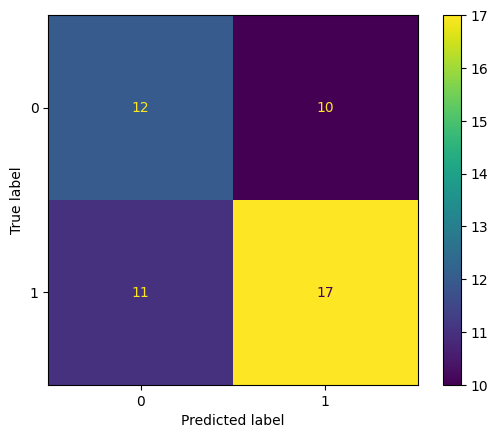

In [42]:
disp.plot()

Summary:
* 12 True positive 0s
* 10 False negative 0s
* 11 False positive 1s
* 17 True negative 1s